# Efficient Influence Function (EIF) & Causal Forest DML and Continuous Treatment

Daniel de Abreu Pereira Uhr

### Tópicos abordados nesta aula:

* Efficient Influence Function (EIF)
* Causal Forest DML and Continuous Treatment


**Observações:** O material apresentado aqui é uma adaptação do material de aula do Prof. Daniel de Abreu Pereira Uhr, e não deve ser utilizado para fins comerciais. O material é disponibilizado para fins educacionais e de pesquisa, e não deve ser reproduzido sem a devida autorização do autor. Este material pode conter erros e imprecisões. O autor não se responsabiliza por quaisquer danos ou prejuízos decorrentes do uso deste material. O uso deste material é de responsabilidade exclusiva do usuário. Caso você encontre erros ou imprecisões neste material, por favor, entre em contato com o autor para que possam ser corrigidos. O autor agradece qualquer *feedback* ou sugestão de melhoria.

---

## Efficient Influence Function (EIF)


A **Efficient Influence Function (EIF)** (ou **Função de Influência Eficiente**) é o **objeto matemático fundamental** que define:

1. o **estimador mais eficiente possível** de um parâmetro causal (como o ATE),
2. e as condições sob as quais esse estimador é **sem viés em primeira ordem** mesmo quando usamos ML flexível nas etapas auxiliares.

Quando queremos estimar um parâmetro causal, por exemplo o efeito médio do tratamento (ATE):

$$
\psi_0 = E[m_1(X) - m_0(X)]
$$

onde ($m_d(X) = E[Y|D=d, X]$),

temos duas fontes de incerteza:

* o erro de amostragem (ruído estatístico);
* e o erro de estimação dos “nuisance functions” (os modelos de ($E[Y|D,X]$) e ($P(D|X)$)).


**Definição**

A **Efficient Influence Function (EIF)** é uma função ($\phi(W; \psi_0)$) que mede **como o erro em cada observação influencia o erro total do estimador** de forma linearizada.

Considere o espaço de todas as distribuições ($P$) para os dados ($W=(Y,D,X)$). O parâmetro de interesse é uma função ($\psi(P)$) (por exemplo, o ATE).

A **influence function** (IF) é definida como:

$$
\phi(W; P) = \left. \frac{d}{d\epsilon} \psi(P_\epsilon) \right|_{\epsilon=0}
$$

onde ($P_\epsilon = (1 - \epsilon) P + \epsilon \delta_W$).

***Interpretação:***

É a **sensibilidade infinitesimal** do estimando ($\psi(P)$) a pequenas perturbações na distribuição amostral em torno de ($P$).

A **Efficient Influence Function (EIF)** é a **influence function com menor variância** entre todas as IFs válidas (isto é, todas que têm esperança zero e derivam corretamente ($\psi(P)$)).
Essa variância mínima define o **semiparametric efficiency bound**.

**Exemplo**

Para ($D \in {0,1}$), o EIF do ATE é:

$$
\phi(W; \eta) =
\left[
\frac{D}{p(X)} - \frac{1-D}{1-p(X)}
\right](Y - m(D,X)) + [m(1,X) - m(0,X)] - \psi
$$

onde:

* ($p(X) = P(D=1|X)$) é o propensity score,
* ($m(d,X) = E[Y|D=d, X]$) é o outcome regression,
* ($\eta = (m, p)$) é o vetor dos “nuisance parameters”.

Esse objeto é importante porque:

* ($E[\phi(W; \eta_0)] = 0$) no ponto verdadeiro;
* Ele é **ortogonal**: pequenas variações em ($m$) ou ($p$) não alteram ($\psi$) em primeira ordem;
* E ele **gera todos os estimadores eficientes** possíveis (TMLE, AIPW, DR-DML, etc).

A EIF serve como a **base de construção** de todos os estimadores modernos de efeito causal:

| Estimador                | Como usa a EIF                                                            |
| ------------------------ | ------------------------------------------------------------------------- |
| **AIPW (Augmented IPW)** | Substitui ($m, p$) por ML e usa a média de ($\phi(W; \hat\eta)$)              |
| **TMLE**                 | Ajusta ($m$) até que a média de ($\phi(W; \hat\eta^*) = 0$)                   |
| **DR-DML**               | Usa cross-fitting e estima ($\psi$) resolvendo ($E_n[\phi(W; \hat\eta)] = 0$) |
| **Causal Forests**       | Aproximam o EIF localmente em cada folha                                  |
| **G-formula**            | Implícita, sem ajuste pela EIF (por isso é menos robusta)                 |


***Propriedades***

1. **Esperança zero:**
   $$
   E[\phi(W; \eta_0)] = 0
   $$

2. **Ortogonalidade:**
   $$
   \frac{\partial E[\phi(W; \eta)]}{\partial \eta}\Big|_{\eta_0} = 0
   $$
   → pequenos erros em ML não afetam ($\hat\psi$).

3. **Variância mínima:**
   $$
   Var(\phi(W; \eta_0)) = \text{Semiparametric Efficiency Bound}
   $$

4. **Inferência assintótica:**
   $$
   \sqrt{n}(\hat\psi - \psi_0) \to N(0, Var(\phi(W; \eta_0)))
   $$
   → Intervalos de confiança vêm diretamente da EIF.

***Relação entre TMLE, DR e DML***

* **TMLE**: constrói um modelo para ($m(D,X)$) e ajusta via *targeting* até satisfazer ($E_n[\phi(W;\hat\eta)] = 0$).
* **DR-DML**: usa cross-fitting e resolve a mesma equação, mas sem targeting iterativo.
* **Ambos estimam o mesmo parâmetro** — o ATE — definido exatamente pela EIF acima.


***Interpretação intuitiva***

Pense na EIF como o **"peso ótimo"** que cada observação deve ter para corrigir viés de confusão.

* O termo ($\frac{D}{p(X)} - \frac{1-D}{1-p(X)}$) ajusta o desequilíbrio de propensão;
* O termo ($Y - m(D,X)$) corrige a predição;
* E ($m(1,X) - m(0,X)$) dá o componente contrafactual esperado.

A média ponderada desses componentes é o **efeito causal eficiente**.

## Causal Forest DML and Continuous Treatment



O **Causal Forest** pode ser entendido como um **estimador semiparamétrico eficiente local**, baseado na **Efficient Influence Function (EIF)** do efeito causal condicional (CATE).


### **1. Contexto semiparamétrico**

Lembre que o parâmetro de interesse é o **CATE**:

$$
\tau(x) = E[Y(1) - Y(0) \mid X = x].
$$

No espaço das distribuições $P$ sobre $W = (Y, D, X)$, o parâmetro alvo $\tau(x)$ pode ser expresso como uma **função funcional** $\psi_x(P)$.

Para cada ponto $x$, podemos definir uma **influence function local**, $\phi(W; \eta, x)$, que lineariza a variação de $\psi_x(P)$ em torno da distribuição verdadeira $P_0$:

$$
\phi(W; \eta, x) =
\left[
\frac{D}{p(X)} - \frac{1 - D}{1 - p(X)}
\right](Y - m(D, X)) +
[m(1, X) - m(0, X)] - \tau(x),
$$

onde $\eta = (m, p)$ contém as funções *nuisance*:
- $m(d, X) = E[Y \mid D = d, X]$ (outcome regression);
- $p(X) = E[D \mid X]$ (propensity score).


### **2. Intuição da EIF local**

Essa expressão é a **EIF do efeito causal pontual**.  
Se tomássemos a média sobre toda a população, teríamos a EIF do ATE.  
Mas o Causal Forest faz algo mais refinado:

> Ele **estima o valor esperado de $\phi(W; \eta, x)$ condicional em $X = x$**.

Ou seja, em vez de resolver $E[\phi(W; \eta)] = 0$ globalmente (como no DML ou TMLE), o Causal Forest **resolve localmente**:

$$
E[\phi(W; \eta, X) \mid X = x] = 0.
$$

Essa é uma regressão condicional da EIF sobre $X$ — exatamente o que as árvores fazem de forma não paramétrica.

### **3. Interpretação geométrica**

- O DML, TMLE e AIPW resolvem **uma equação de momento global** baseada na EIF:
  $$
  E_n[\phi(W; \hat\eta)] = 0.
  $$
  → Isso dá o **ATE** (efeito médio).

- O Causal Forest, em contraste, resolve **várias equações de momento locais**:
  $$
  E_n[\phi(W; \hat\eta) \mid X = x] = 0.
  $$
  → Isso dá o **CATE(x)** (efeito heterogêneo condicional).

Em outras palavras:

> O Causal Forest é um **estimador não paramétrico da EIF local**, com pesos $\alpha_i(x)$ aprendidos pelas árvores.

### **4. Formulação em termos de pesos**

O estimador do CATE pode ser escrito como:

$$
\hat\tau(x)
= \sum_{i=1}^n \alpha_i(x)
\Bigg[
\frac{D_i - \hat{p}(X_i)}{\hat{p}(X_i)(1 - \hat{p}(X_i))}
\big(Y_i - \hat{m}(D_i, X_i)\big)
\Bigg],
$$

onde os **pesos adaptativos** $\alpha_i(x)$ são definidos pela floresta:

- $\alpha_i(x)$ é alto se $X_i$ for “próximo” de $x$ (mesma folha em várias árvores);
- $\sum_i \alpha_i(x) = 1$;
- Os pesos são **“honestos”**, pois são calculados com dados separados para splitting e estimation.

Esse formato é uma versão suavizada da EIF local — cada árvore contribui com um kernel adaptativo em torno de $x$.

### **5. Relação com a EIF e a eficiência semiparamétrica**

O Causal Forest herda propriedades centrais da EIF:

| Propriedade | Interpretação no Causal Forest |
|--------------|--------------------------------|
| **Esperança zero** | $E[\phi(W; \eta_0, X) \mid X=x] = 0$ no verdadeiro modelo |
| **Ortogonalidade** | Pequenos erros em $\hat{m}$ e $\hat{p}$ não afetam $\hat{\tau}(x)$ em primeira ordem |
| **Eficiência local** | A variância mínima da $\phi(W; \eta, x)$ define o bound semiparamétrico para o CATE |
| **Inferência** | O *Jackknife* honesto estima $Var(\hat{\tau}(x))$ a partir da variância da EIF local |

Assim, o Causal Forest é um **estimador semiparamétrico eficiente ponto a ponto**, enquanto o DML é eficiente para o parâmetro médio (global).

### **6. Conexão com outros estimadores**

| Estimador | Relação com a EIF |
|------------|------------------|
| **AIPW / DR-DML** | Usa a EIF global, média sobre toda a amostra |
| **TMLE** | Ajusta $m(D,X)$ até $E_n[\phi(W; \hat\eta)] = 0$ |
| **Causal Forest** | Estima $E_n[\phi(W; \hat\eta) \mid X = x] = 0$ localmente via floresta |
| **Orthogonal Forest (EconML)** | Versão explícita que estima $\tau(x)$ resolvendo equações de momento baseadas na EIF local com *cross-fitting* |


O Causal Forest **não altera a EIF** — ele muda **a forma como ela é usada**:

- O DML e o TMLE integram a EIF para obter um escalar (ATE);
- O Causal Forest “espalha” a EIF sobre o espaço de $X$, obtendo uma função (CATE).

> Em termos conceituais, o Causal Forest é um **regressor não paramétrico da EIF**.



> “O Causal Forest estima a Efficient Influence Function **condicional** em $X$.”


### Aplicação do Causal Forest DML em Python

In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns

# DataFrame
df = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/cattaneo2.dta")

In [4]:
# Criar a variável de resultado
df['Y'] = df['bweight']

# Crie a variável 'Treated' com valor inicial de 0
df['Treated'] = 0
# Recodifique 'Treated' para 1 se 'mbsmoke' for igual a 'smoker'
df.loc[df['mbsmoke'] == 'smoker', 'Treated'] = 1

df['casada'] = 0
df.loc[df['mmarried']=='married', 'casada'] = 1

# Conjunto de Covariáveis X
X = ['casada', 'mage', 'medu']

# garanta a ordem correta das categorias (se necessário)
order = ['0 daily', '1-5 daily', '6-10 daily', '11+ daily']
df['msmoke'] = pd.Categorical(df['msmoke'], categories=order, ordered=True)

# mapeamentos
map_mid = {
    '0 daily': 0,
    '1-5 daily': 3,
    '6-10 daily': 8,
    '11+ daily': 12  # ajuste se quiser um outro representativo (ex.: 15)
}
map_ord = {k: i for i, k in enumerate(order)}  # 0,1,2,3 (ordinal)

# variáveis de tratamento
df['T_cont'] = df['msmoke'].map(map_mid).astype(float) 

c:\Users\danie\OneDrive\00000 - 2025\0_Python_Estimators\econml-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


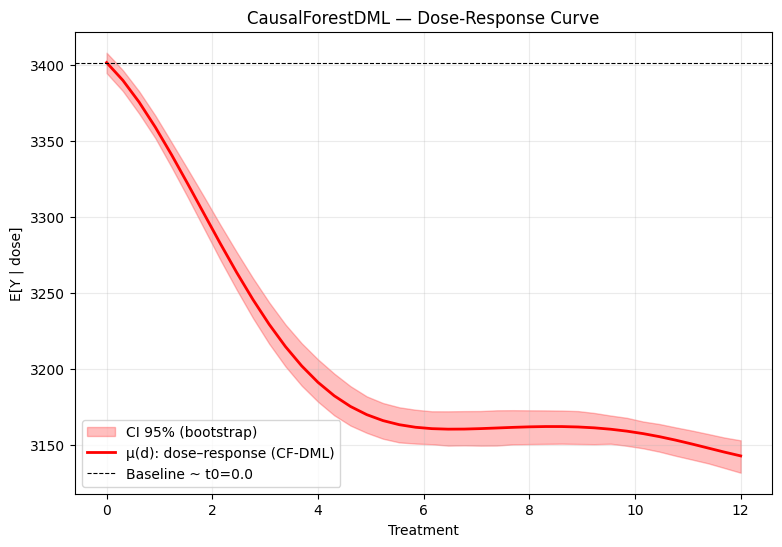

In [5]:
# ==========================================================
# CausalForestDML — Dose–resposta com IC (vermelho),
# Nível = E[Y|t0,X] (modelo de outcome) + efeito CF (t0->t)
# Grid; RBF features; bootstrap nas unidades X
# ==========================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline
from sklearn.base import clone
from econml.dml import CausalForestDML

# ---------- Config ----------
RNG_SEED = 42
rng = np.random.default_rng(RNG_SEED)

# ---------- 0) Dados ----------
try:
    df
except NameError:
    df = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/cattaneo2.dta")
    df['Y'] = df['bweight']
    df['casada'] = (df['mmarried'] == 'married').astype(int)

# Use o T_cont contínuo que você já criou (sem jitter), ou crie mapeamento midpoints
# Aqui assumo que df['T_cont'] já existe (se não, crie como no seu TMLE).
df_ = df[['Y','T_cont','casada','mage','medu']].dropna().copy()

Y = df_['Y'].to_numpy(dtype=np.float32)
T = df_['T_cont'].to_numpy(dtype=np.float32)
X = df_[['casada','mage','medu']].to_numpy(dtype=np.float32)

Xn = StandardScaler().fit_transform(X).astype(np.float32)

# ---------- 1) Featurizador em T: RBF (mais rico → curva menos "quadrática") ----------
tfeat = RBFSampler(gamma=0.08, n_components=150, random_state=RNG_SEED)

# ---------- 2) Nuisance models (um pouco mais fortes, ainda rápidos) ----------
rf_cfg = dict(
    n_estimators=120,
    max_depth=10,
    min_samples_leaf=15,
    max_features='sqrt',
    n_jobs=-1,
    random_state=RNG_SEED
)
model_y = ExtraTreesRegressor(**rf_cfg)
model_t = ExtraTreesRegressor(**rf_cfg)

# ---------- 3) CausalForestDML ----------
cf = CausalForestDML(
    model_y=model_y,
    model_t=model_t,
    treatment_featurizer=tfeat,
    discrete_treatment=False,
    n_estimators=300,
    min_samples_leaf=10,
    max_depth=8,
    random_state=RNG_SEED,
    n_jobs=-1,
    verbose=0
)
# T em 2D por causa do featurizer
cf.fit(Y, T.reshape(-1, 1), X=Xn)

# ---------- 4) Modelo de outcome para o NÍVEL E[Y|t0, X]
# Usamos a MESMA featurização de T do CF para coerência
# Feature final: concatena Xn com phi(T) (RBF transform)
Phi_T = tfeat.fit_transform(T.reshape(-1, 1))  # usa a mesma instância tfeat
Z = np.hstack([Xn, Phi_T])                     # regressão Y ~ X + phi(T)

outcome_model = clone(model_y)
outcome_model.fit(Z, Y)

def predict_y_at_t(Xblock, t_scalar):
    # constroi features [X, phi(t)] p/ cada linha de Xblock
    m = Xblock.shape[0]
    Phi = tfeat.transform(np.full((m, 1), t_scalar, dtype=np.float32))
    Zt = np.hstack([Xblock, Phi])
    return outcome_model.predict(Zt)

# ---------- 5) Curva dose–resposta + IC (bootstrap nas unidades X)
# amostra maior de X para agregação
M = min(600, len(Xn))
idx = rng.choice(len(Xn), size=M, replace=False)
Xsub = Xn[idx]

# grid de 40 doses
t_min, t_max = float(np.nanmin(T)), float(np.nanmax(T))
G = 40
t_grid = np.linspace(t_min, t_max, G).astype(np.float32)

# baseline: percentil 5% (na região com dados)
t0 = float(np.percentile(T, 5))

# 5.1) Nível no baseline por unidade: Y_hat(t0|X)
y0_hat = predict_y_at_t(Xsub, t0)  # (M,)

# 5.2) Efeito marginal CF por unidade para cada t do grid
Eff = np.empty((G, M), dtype=np.float32)
for g, t1 in enumerate(t_grid):
    T0 = np.full((M, 1), t0, dtype=np.float32)
    T1 = np.full((M, 1), t1, dtype=np.float32)
    Eff[g, :] = cf.effect(Xsub, T0=T0, T1=T1)  # τ(X; t0→t1)

# 5.3) Reconstrução do nível e média por dose
# μ(d) = mean_X [ Y_hat(t0|X) + τ(X; t0→d) ]
mu_hat = (y0_hat[None, :] + Eff).mean(axis=1)  # (G,)

# 5.4) Bootstrap das unidades X (rápido, sem refitar o CF)
B = 300
boot_mu = np.empty((B, G), dtype=np.float32)
for b in range(B):
    samp = rng.integers(0, M, size=M)  # reamostra unidades
    boot_mu[b, :] = (y0_hat[samp][None, :] + Eff[:, samp]).mean(axis=1)

alpha = 0.05
lo = np.percentile(boot_mu, 100*(alpha/2), axis=0)
hi = np.percentile(boot_mu, 100*(1-alpha/2), axis=0)

# ---------- 6) Plot (vermelho) ----------
plt.figure(figsize=(9,6))
plt.fill_between(t_grid, lo, hi, color='red', alpha=0.25, label='CI 95% (bootstrap)')
plt.plot(t_grid, mu_hat, color='red', lw=2, label='μ(d): dose–response (CF-DML)')
plt.axhline(mu_hat[np.argmin(np.abs(t_grid - t0))], color='k', ls='--', lw=0.8, label=f'Baseline ~ t0={t0:.1f}')
plt.xlabel("Treatment")
plt.ylabel("E[Y | dose]")
plt.title("CausalForestDML — Dose-Response Curve")
plt.legend()
plt.grid(True, alpha=0.25)
plt.show()

***CATE***

Comparando curvas CATE, para perfil/status diferente

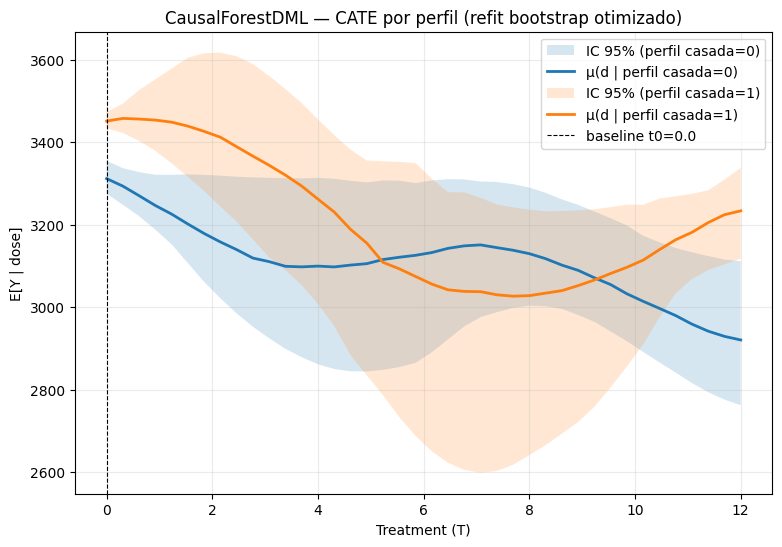

In [ ]:
# ==========================================================
# CATE (por perfil) — CF + baseline outcome
# Refit bootstrap MULTI-perfil, economizando memória (float32)
# ==========================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.kernel_approximation import RBFSampler

# -----------------------------
# 0) Pré-requisitos mínimos
# -----------------------------
assert 'df_' in globals(), "df_ não encontrado."
assert 'COLS_X' in globals(), "Defina COLS_X (ordem das covariáveis)."
assert 'T' in globals(), "T (tratamento) não encontrado."
assert 'outcome_model' in globals(), "outcome_model não encontrado (do ajuste original)."
assert 'tfeat' in globals(), "tfeat não encontrado (do ajuste original)."

if 'scaler' not in globals():
    scaler = StandardScaler().fit(df_[COLS_X].astype(float))

# -----------------------------
# Helpers
# -----------------------------
def _resolve_control_value(series: pd.Series, spec):
    if isinstance(spec, (int, float, np.number)):
        return float(spec)
    if isinstance(spec, str):
        s = spec.strip().lower()
        if s == "mean":   return float(series.mean())
        if s == "median": return float(series.median())
        if s.startswith("p"):
            q = float(s[1:])
            return float(np.percentile(series.to_numpy(dtype=float), q))
    raise ValueError(f"Especificação inválida: {spec}")

def make_controlled_profile(df_base: pd.DataFrame, cols_x, control_spec: dict):
    return {c: _resolve_control_value(df_base[c], control_spec.get(c, "mean")) for c in cols_x}

def to_vec(profile: dict, cols_x):
    return np.array([profile[c] for c in cols_x], dtype=np.float32).reshape(1, -1)

# -----------------------------
# 1) Predição de nível no baseline (usa outcome_model/tfeat do ajuste original)
# -----------------------------
def predict_y_at_t(Xblock_scaled, t_scalar):
    m = Xblock_scaled.shape[0]
    Phi = tfeat.transform(np.full((m, 1), t_scalar, dtype=np.float32))
    Zt  = np.hstack([Xblock_scaled, Phi])
    return outcome_model.predict(Zt)

# -----------------------------
# 2) Bootstrap com REFIT (multi-perfil) — otimizado p/ memória
# -----------------------------
def cate_curves_refit_multi(df_base, cols_x, y_col, t_col,
                            profiles: dict,  # {"A": dict, "B": dict, ...}
                            t_grid, t0,
                            B=100, alpha=0.05, rng_seed=123,
                            rbf_gamma=0.08, rbf_comp=30,
                            cf_params=None, rf_cfg=None):
    """
    Retorna dict com {key: (mu_hat, lo, hi)} para cada perfil em 'profiles'.
    Refita CF/outcome em cada réplica e computa TODAS as curvas de uma vez.
    """
    from econml.dml import CausalForestDML
    rng = np.random.default_rng(rng_seed)

    # ExtraTrees mais parcimonioso e n_jobs=1 para evitar pico de RAM
    if rf_cfg is None:
        rf_cfg = dict(n_estimators=120, max_depth=6, min_samples_leaf=25,
                      max_features='sqrt', n_jobs=1, random_state=42)
    # Hiperparâmetros do CF **válidos** no CausalForestDML
    if cf_params is None:
        cf_params = dict(
            n_estimators=120,
            min_samples_leaf=25,
            max_depth=6,
            max_features=0.5,      # fração de features por split
            subforest_size=40,     # agrega em blocos para reduzir memória
            honest=True,
            n_jobs=1,              # evita paralelo pesado em RAM
            verbose=0,
            random_state=42,
            discrete_treatment=False
        )

    # Dados base em float32
    dfb = df_base[cols_x + [y_col, t_col]].dropna().copy()
    X_all = dfb[cols_x].to_numpy(dtype=np.float32)
    Y_all = dfb[y_col].to_numpy(dtype=np.float32)
    T_all = dfb[t_col].to_numpy(dtype=np.float32).reshape(-1, 1)

    n = len(Y_all)
    G = len(t_grid)
    boot_store = {k: np.empty((B, G), dtype=np.float32) for k in profiles.keys()}

    for b in range(B):
        idx = rng.integers(0, n, size=n)
        Xb = X_all[idx].astype(np.float32, copy=False)
        Yb = Y_all[idx].astype(np.float32, copy=False)
        Tb = T_all[idx].astype(np.float32, copy=False)

        scaler_b = StandardScaler().fit(Xb)
        Xbn = scaler_b.transform(Xb).astype(np.float32, copy=False)

        # Featurizer RBF: fit + transform (leve)
        tfeat_b = RBFSampler(gamma=rbf_gamma, n_components=rbf_comp, random_state=42)
        tfeat_b.fit(Tb)
        Phi_Tb = tfeat_b.transform(Tb).astype(np.float32, copy=False)

        # Nuisances
        model_y_b = ExtraTreesRegressor(**rf_cfg)
        model_t_b = ExtraTreesRegressor(**rf_cfg)

        # CF com featurizer (sem subsample_fr)
        cf_b = CausalForestDML(model_y=model_y_b, model_t=model_t_b,
                               treatment_featurizer=tfeat_b, **cf_params)
        cf_b.fit(Yb, Tb, X=Xbn)

        # Modelo de nível com o mesmo φ(T)
        Zb = np.hstack([Xbn, Phi_Tb]).astype(np.float32, copy=False)
        outcome_model_b = ExtraTreesRegressor(**rf_cfg).fit(Zb, Yb)

        def predict_y_at_t_b(Xblock_scaled, t_scalar):
            m = Xblock_scaled.shape[0]
            Phi = tfeat_b.transform(np.full((m, 1), t_scalar, dtype=np.float32))
            Zt  = np.hstack([Xblock_scaled, Phi]).astype(np.float32, copy=False)
            return outcome_model_b.predict(Zt)

        # Perfis desta réplica
        x0s_dict = {}
        y0_dict  = {}
        for k, prof in profiles.items():
            x0  = to_vec(prof, cols_x)
            x0s = scaler_b.transform(x0.astype(np.float32)).astype(np.float32, copy=False)
            x0s_dict[k] = x0s
            y0_dict[k]  = float(predict_y_at_t_b(x0s, t0)[0])

        # Curvas
        for j, t1 in enumerate(t_grid):
            T0 = np.array([[t0]], dtype=np.float32)
            T1 = np.array([[t1]], dtype=np.float32)
            for k in profiles.keys():
                eff = float(cf_b.effect(x0s_dict[k], T0=T0, T1=T1)[0])
                boot_store[k][b, j] = y0_dict[k] + eff

    out = {}
    for k in profiles.keys():
        mu_hat = np.median(boot_store[k], axis=0)
        lo = np.percentile(boot_store[k], 100*(alpha/2), axis=0)
        hi = np.percentile(boot_store[k], 100*(1-alpha/2), axis=0)
        out[k] = (mu_hat, lo, hi)
    return out

# -----------------------------
# 3) Perfis e grid
# -----------------------------
CONTROL_SPEC_BASE = {'casada': 'mean', 'mage': 'mean', 'medu': 'mean'}
ctrl_base = make_controlled_profile(df_[COLS_X], COLS_X, CONTROL_SPEC_BASE)
perfil_A  = {**ctrl_base, 'casada': 0}
perfil_B  = {**ctrl_base, 'casada': 1}

if 't_grid' not in globals():
    t_lo, t_hi = np.quantile(T, [0.02, 0.98])
    t_grid = np.linspace(float(t_lo), float(t_hi), 30, dtype=np.float32)  # 30 pts
if 't0' not in globals():
    t0 = float(np.quantile(T, 0.05))

profiles = {"A": perfil_A, "B": perfil_B}

# -----------------------------
# 4) Rodar (B pequeno para RAM; aumente se couber)
# -----------------------------
alpha = 0.05
res = cate_curves_refit_multi(df_base=df_, cols_x=COLS_X,
                              y_col='Y', t_col='T_cont',
                              profiles=profiles, t_grid=t_grid, t0=t0,
                              B=100, alpha=alpha, rng_seed=123,
                              rbf_gamma=0.08, rbf_comp=30)

mu_A, lo_A, hi_A = res["A"]
mu_B, lo_B, hi_B = res["B"]

# -----------------------------
# 5) Plot
# -----------------------------
plt.figure(figsize=(9,6))
plt.fill_between(t_grid, lo_A, hi_A, alpha=0.18, label='IC 95% (perfil casada=0)')
plt.plot(t_grid, mu_A, lw=2, label='μ(d | perfil casada=0)')
plt.fill_between(t_grid, lo_B, hi_B, alpha=0.18, label='IC 95% (perfil casada=1)')
plt.plot(t_grid, mu_B, lw=2, label='μ(d | perfil casada=1)')
plt.axvline(t0, color='k', ls='--', lw=0.8, label=f'baseline t0={t0:.1f}')
plt.xlabel("Treatment (T)")
plt.ylabel("E[Y | dose]")
plt.title("CausalForestDML — CATE por perfil (refit bootstrap otimizado)")
plt.grid(True, alpha=0.25); plt.legend(); plt.show()
